In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import easyocr
import util
import pandas as pd
import re
from collections import deque


In [2]:
model_cfg_path = './darknet-yolov3.cfg'
model_weights_path = './model.weights'
input_dir = './license_plates_detection_train/'
net = cv2.dnn.readNetFromDarknet(model_cfg_path, model_weights_path)

In [157]:
img_path = './test_private/1000.jpg'

img = cv2.imread(img_path)

In [158]:
H, W, _ = img.shape

blob = cv2.dnn.blobFromImage(img, 1 / 255, (416, 416), (0, 0, 0), True)

net.setInput(blob)

detections = util.get_outputs(net)

In [159]:
bboxes = []
class_ids = []
scores = []

for detection in detections:
    bbox = detection[:4]

    xc, yc, w, h = bbox
    bbox = [int(xc * W), int(yc * H), int(w * W), int(h * H)]

    bbox_confidence = detection[4]

    class_id = np.argmax(detection[5:])
    score = np.amax(detection[5:])

    bboxes.append(bbox)
    class_ids.append(class_id)
    scores.append(score)

bboxes, class_ids, scores = util.NMS(bboxes, class_ids, scores)

In [164]:
reader = easyocr.Reader(['en'])
text = ''

for attempt in range(20):  
    for bbox_, bbox in enumerate(bboxes):
        xc, yc, w, h = bbox

        license_plate = img[int(yc - (h / 1.5)):int(yc + (h / 1.5)), int(xc - (w / 1.5)):int(xc + (w / 1.5)), :].copy()

        img = cv2.rectangle(img,
                            (int(xc - (w / 2)), int(yc - (h / 2))),
                            (int(xc + (w / 2)), int(yc + (h / 2))),
                            (0, 255, 0),
                            2)
        license_plate_gray = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(license_plate_gray,(1,1),0)
        binary = cv2.threshold(blur, 180, 255,
                             cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

        _, license_plate_thresh = cv2.threshold(license_plate_gray, 120, 255, cv2.THRESH_BINARY_INV)

        output = reader.readtext(license_plate_gray, allowlist='0123456789')
        num_digits = 0
        for out in output:
            text += out[1]
            num_digits += len([c for c in out[1] if c.isdigit()])
            if num_digits >= 8:
                break
    
    if attempt == 1:
        break
    else:
        text = ''
    
print(text)
        


19439573


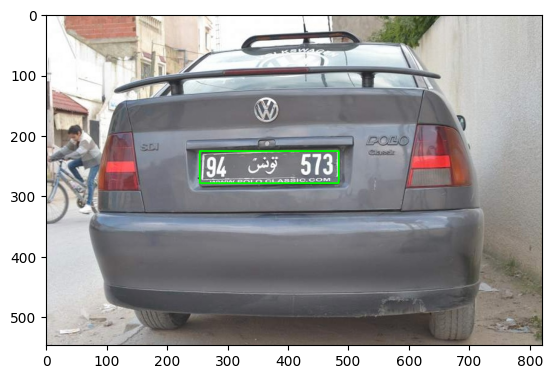

In [161]:
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

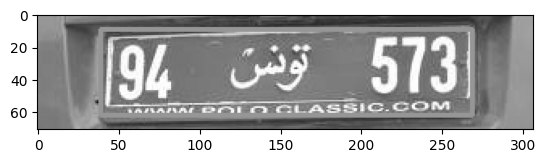

In [162]:
plt.figure()
plt.imshow(cv2.cvtColor(license_plate_gray, cv2.COLOR_BGR2RGB))

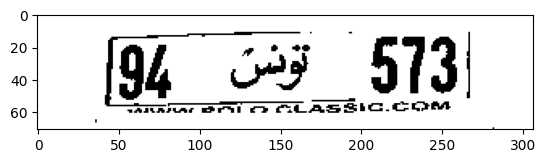

In [163]:
plt.figure()
plt.imshow(cv2.cvtColor(binary, cv2.COLOR_BGR2RGB))

In [ ]:
plt.show()

In [11]:
temp_list = []
def Convert(string, la_list):
    la_list = []
    list1 = []
    list1[:0] = string
    while len(list1)>7:
      del list1[-5]
    while len(list1)<7:
      list1 = deque(list1)
      list1.appendleft(0)
      list1 = list(list1)

    for i in list1:
      test = [0,0,0,0,0,0,0,0,0,0]
      new_val = int(i)
      test[new_val] = 1
      la_list.append(test)
  
    return la_list

print(Convert(text,temp_list))


[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]


In [12]:
submission = pd.read_csv('./SampleSubmission.csv')
submission

,id,0,1,2,3,4,5,6,7,8,9
0,img_901_1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,img_901_2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,img_901_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,img_901_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,img_901_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1465,img_1113_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,img_1113_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1467,img_1113_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1468,img_1113_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
